# Final Project4 - Modelling Performance - Predicting Airline Delay

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

from scipy import stats
import seaborn as sns

#This will render the plots inline
%matplotlib inline

In [3]:
#Import the Airline Delay data in csv format
fltdata = pd.read_csv('/Users/Prakash/GA/PROJECTS/airlinedelaycauses-DelayedFlights.csv')

In [4]:
#Check the Size of the data (How many Rows and Columns)
fltdata.shape

(1936758, 30)

In [5]:
# Display the header to show how the dataset looks like
fltdata.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
#Verify if all the data is for the year 2008

print 'Total data for the year 2008: {}'.format( len(fltdata[fltdata['Year'] == 2008]))
print 'Total data for non 2008 year: {}' .format (len(fltdata[fltdata['Year'] != 2008]))

Total data for the year 2008: 1936758
Total data for non 2008 year: 0


In [7]:
#Print the header for different types of delay
fltdata[['ArrDelay','DepDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].head()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-14.0,8.0,NaN,NaN,NaN,NaN,NaN
1,2.0,19.0,NaN,NaN,NaN,NaN,NaN
2,14.0,8.0,NaN,NaN,NaN,NaN,NaN
3,34.0,34.0,2.0,0.0,0.0,0.0,32.0
4,11.0,25.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Split the data to have limited data as train data since the data set is very large. 
# Using this only for analysis purpose and for model trainign would use the complete dataset.
# Plotting graphs was too much time consuming with so much data so used a subset of that data.

#X_train, X_test = train_test_split(fltdata, train_size=0.3)
#print X_train.shape
#print X_test.shape
#data = X_train

data = fltdata.sample(n=100000)
print 'Length of original data set is : {} '.format(fltdata.shape)
print 'Reduced set of data size is : {} '.format(data.shape)


Length of original data set is : (1936758, 30) 
Reduced set of data size is : (100000, 30) 


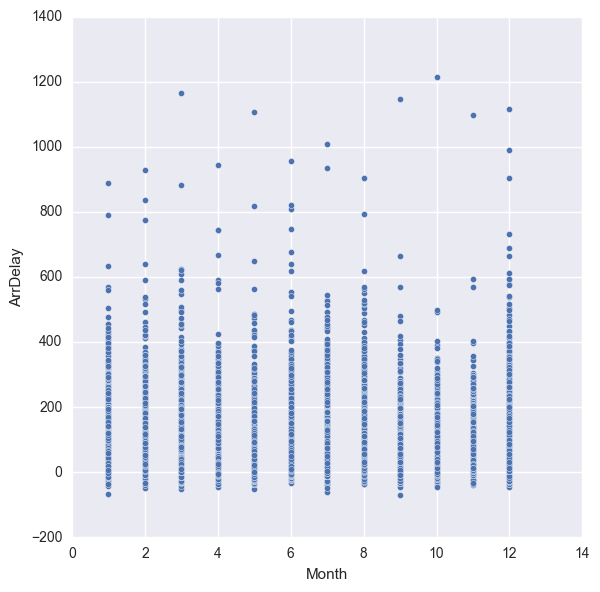

In [9]:
#Plot the Arrival Dealy to show which month has the maximum delay
sns.pairplot(data, x_vars='Month', y_vars='ArrDelay', kind='scatter', size=6)

In [10]:
#cross tabulation of Day of Week and Month
pd.crosstab(data.DayOfWeek,data.Month)

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
1,1211,1463,1823,1044,1004,1764,1414,1173,894,717,607,1975
2,1504,1382,1224,1158,965,1237,1472,1039,748,564,618,1724
3,1441,1365,1265,1036,991,1318,1466,930,533,807,643,1660
4,1833,1370,1280,1146,1392,1578,1644,1123,704,994,813,1206
5,1367,2016,1595,1453,1682,1509,1068,1583,861,1012,927,1419
6,887,938,1500,882,1034,1185,1041,1211,466,467,699,1210
7,1257,1285,1671,1193,866,1810,1375,1127,760,799,1220,1363


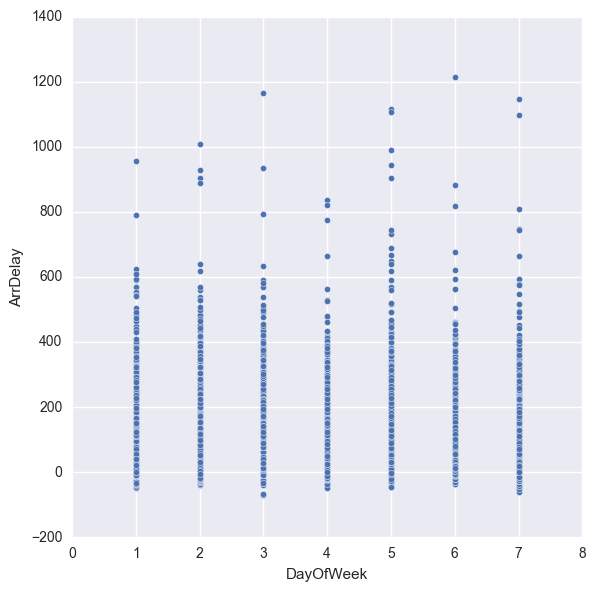

In [11]:
#Plot the Arrival Dealy to show which Day of week has the maximum delay
sns.pairplot(data, x_vars='DayOfWeek', y_vars='ArrDelay', kind='scatter', size=6)

In [12]:
#Count the number of flights which had on time arrival
len(fltdata[fltdata['ArrDelay'] == 0])

#len(fltdata[fltdata['Year'] == 2008]) 

27040

In [13]:
#Count the number of flights which had late arrival
len(fltdata[fltdata['ArrDelay'] > 0])

1723415

In [14]:
#Count the number of flights which were ahead of the arrival schedule
len(fltdata[fltdata['ArrDelay'] < 0])

177916

In [15]:
#What was the maximum delay in minutes
fltdata['ArrDelay'].max()

2461.0

In [16]:
#Confirm that was the maximum delay
len(fltdata[fltdata['ArrDelay'] > 2461])

0

In [17]:
#Print the row where there was maximum Flight Delay

fltdata.loc[fltdata['ArrDelay'].argmax()]

Unnamed: 0           1018798
Year                    2008
Month                      2
DayofMonth                 3
DayOfWeek                  7
DepTime                 1117
CRSDepTime              1820
ArrTime                 2256
CRSArrTime               555
UniqueCarrier             NW
FlightNum                808
TailNum               N817NW
ActualElapsedTime        459
CRSElapsedTime           455
AirTime                  437
ArrDelay                2461
DepDelay                2457
Origin                   HNL
Dest                     MSP
Distance                3972
TaxiIn                     6
TaxiOut                   16
Cancelled                  0
CancellationCode           N
Diverted                   0
CarrierDelay            1455
WeatherDelay               0
NASDelay                   4
SecurityDelay              0
LateAircraftDelay       1002
Name: 322516, dtype: object

In [18]:
#What was the earliest arrival time
fltdata['ArrDelay'].min()

-109.0

In [19]:
#Confirm that was the earliest arrival time
len(fltdata[fltdata['ArrDelay'] < -109])

0

In [20]:
#Print the row with earliest arrival Flight
fltdata.loc[fltdata['ArrDelay'].argmin()]

Unnamed: 0           3698229
Year                    2008
Month                      7
DayofMonth                31
DayOfWeek                  4
DepTime                 1449
CRSDepTime              1430
ArrTime                 1331
CRSArrTime              1520
UniqueCarrier             WN
FlightNum                987
TailNum               N396SW
ActualElapsedTime         42
CRSElapsedTime           170
AirTime                   29
ArrDelay                -109
DepDelay                  19
Origin                   AUS
Dest                     SAN
Distance                1164
TaxiIn                     3
TaxiOut                   10
Cancelled                  0
CancellationCode           N
Diverted                   0
CarrierDelay             NaN
WeatherDelay             NaN
NASDelay                 NaN
SecurityDelay            NaN
LateAircraftDelay        NaN
Name: 1110539, dtype: object

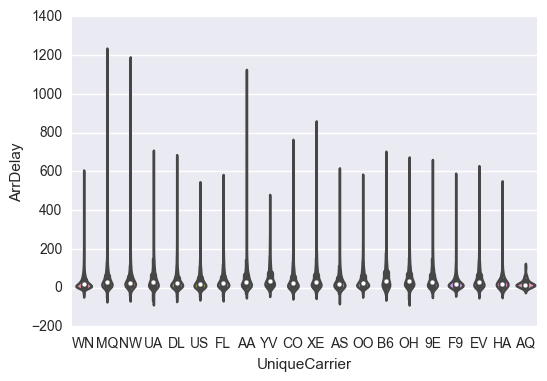

In [21]:
#Plot the delay for each carrier
sns.violinplot(x=data.UniqueCarrier,y=data.ArrDelay,)

In [22]:
data.columns.values

array(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'], dtype=object)

In [23]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
210392,670617,2008,2,22,5,1707.0,1615,2030.0,1950,WN,...,5.0,9.0,0,N,0,0.0,0.0,40.0,0.0,0.0
1012353,3394899,2008,6,15,7,1751.0,1710,1903.0,1835,MQ,...,4.0,10.0,0,N,0,24.0,0.0,0.0,0.0,4.0
1496197,5222240,2008,9,11,4,2006.0,1955,2159.0,2200,MQ,...,4.0,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN
514789,1611998,2008,3,10,1,1342.0,1331,1606.0,1605,NW,...,5.0,12.0,0,N,0,NaN,NaN,NaN,NaN,NaN
515332,1613847,2008,3,29,6,1307.0,1113,1424.0,1237,NW,...,6.0,6.0,0,N,0,0.0,0.0,0.0,0.0,107.0


In [24]:
#len(fltdata[fltdata['ArrDelay'] < -109])
#len(data[data['WeatherDelay'] == NaN])
sum(data.WeatherDelay.isnull())

35635

In [25]:
#Calculate the total number of delayed Flights
#Create a new data field 'Delayed' that would store Boolean value of if flight is delayed or not delayed
data['Delayed'] = data['ArrDelay'].apply(lambda x:x>0)

#Print the distinct number of values for the Delayed field
data['Delayed'].value_counts()

True     88965
False    11035
Name: Delayed, dtype: int64

In [26]:
#Calculate the overall percentage of delayed flights
data_delayed = data['Delayed'].value_counts()[1]
data_notdelayed = data['Delayed'].value_counts()[0]
#print data_delayed
#print data_notdelayed

percentage_delayed = float(data_delayed) / (data_delayed + data_notdelayed)
print 'Total Percentage of Delayed flights is : {}%'.format(percentage_delayed*100)

Total Percentage of Delayed flights is : 88.965%


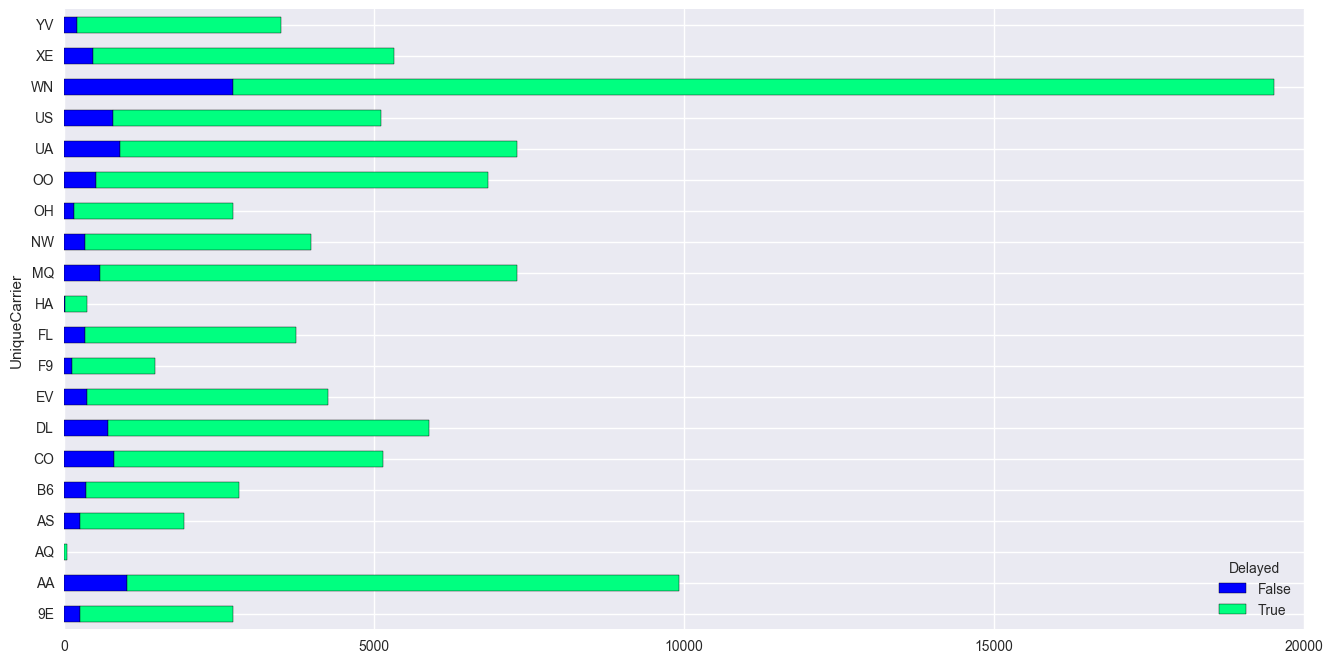

In [27]:
#Calculate the delayed/non delayed flights based on carrier
data_groupby_carrier = data.groupby(['UniqueCarrier','Delayed'])
count_delayby_carrier = data_groupby_carrier.size().unstack()

#count_delayby_carrier
count_delayby_carrier.plot(kind='barh', stacked=True, figsize=[16,8], colormap='winter')


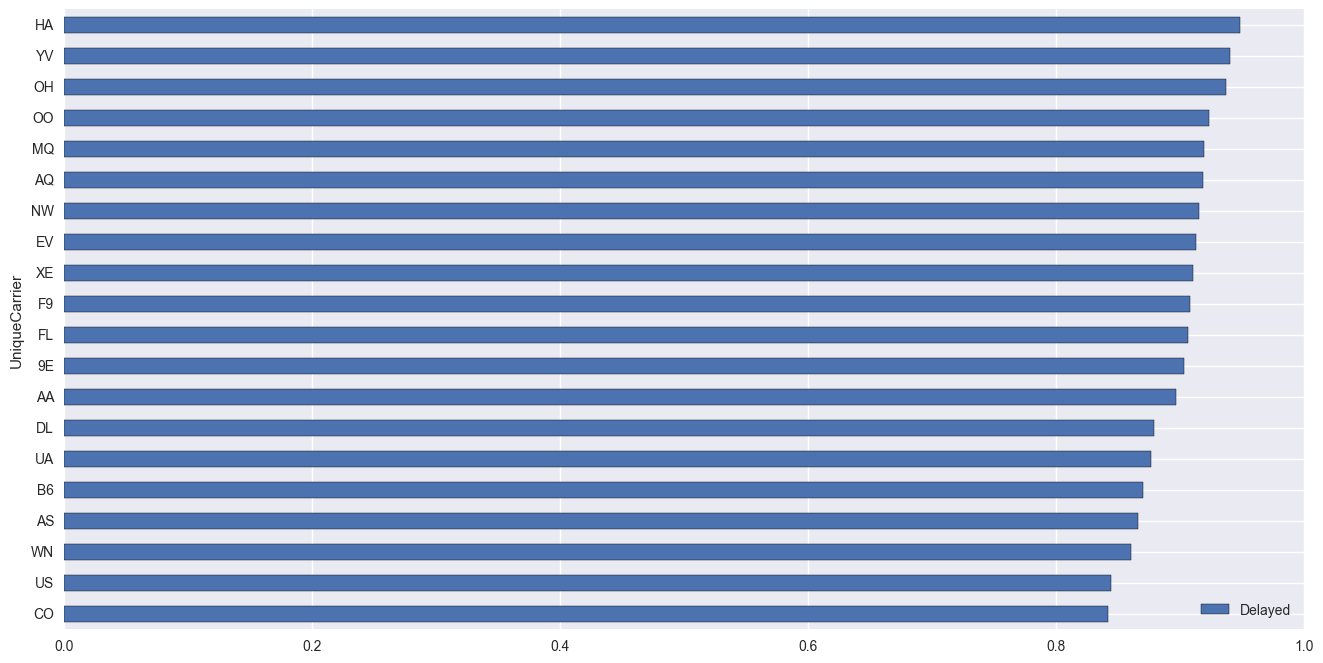

In [48]:
#Calculate the delayed/non delayed flights based on carrier
data[['UniqueCarrier','Delayed']].groupby('UniqueCarrier').mean().sort_values('Delayed').plot(kind='barh', 
                                                                                              figsize=(16,8))
# data.columns

In [28]:
data_groupby_carrier.Delayed.count()

UniqueCarrier  Delayed
9E             False        264
               True        2467
AA             False       1024
               True        8902
AQ             False          4
               True          45
AS             False        259
               True        1673
B6             False        366
               True        2453
CO             False        813
               True        4336
DL             False        713
               True        5182
EV             False        371
               True        3898
F9             False        136
               True        1342
FL             False        349
               True        3401
HA             False         19
               True         353
MQ             False        586
               True        6718
NW             False        337
               True        3649
OH             False        171
               True        2558
OO             False        522
               True        6327
UA             Fa

In [29]:
data.columns.values

array(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Delayed'], dtype=object)

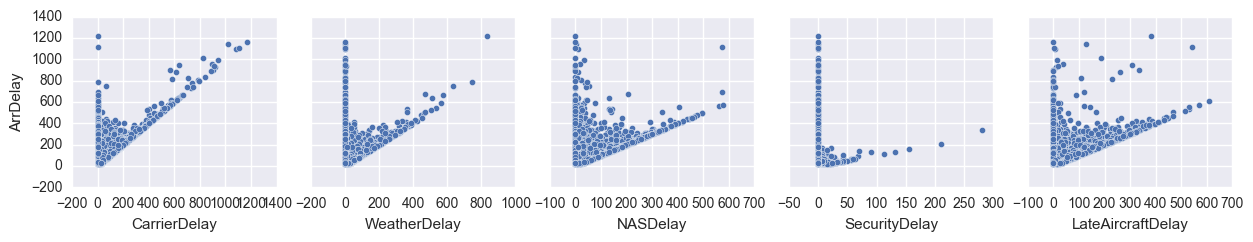

In [39]:
#Do a Pair Plot to see analyze if there is any relationship between different types of delay causing De
sns.pairplot(data,x_vars=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],y_vars='ArrDelay',dropna=True)

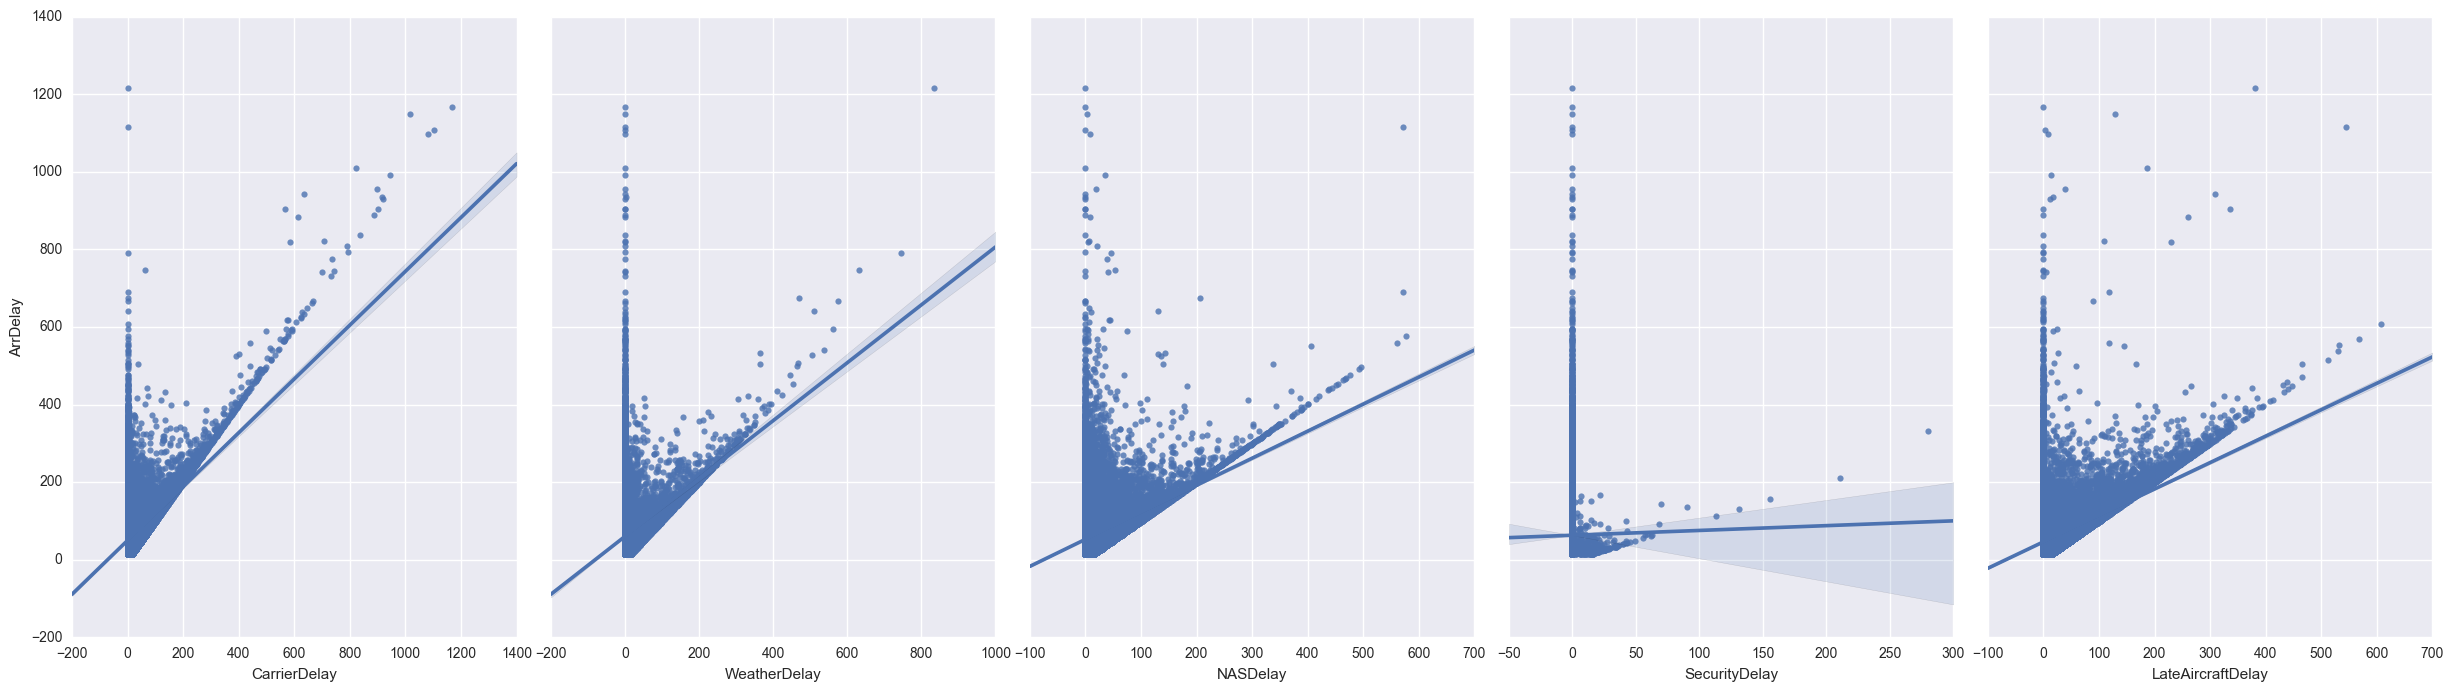

In [31]:
sns.pairplot(data,x_vars=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],y_vars='ArrDelay',size=7,aspect=0.7,kind='reg')

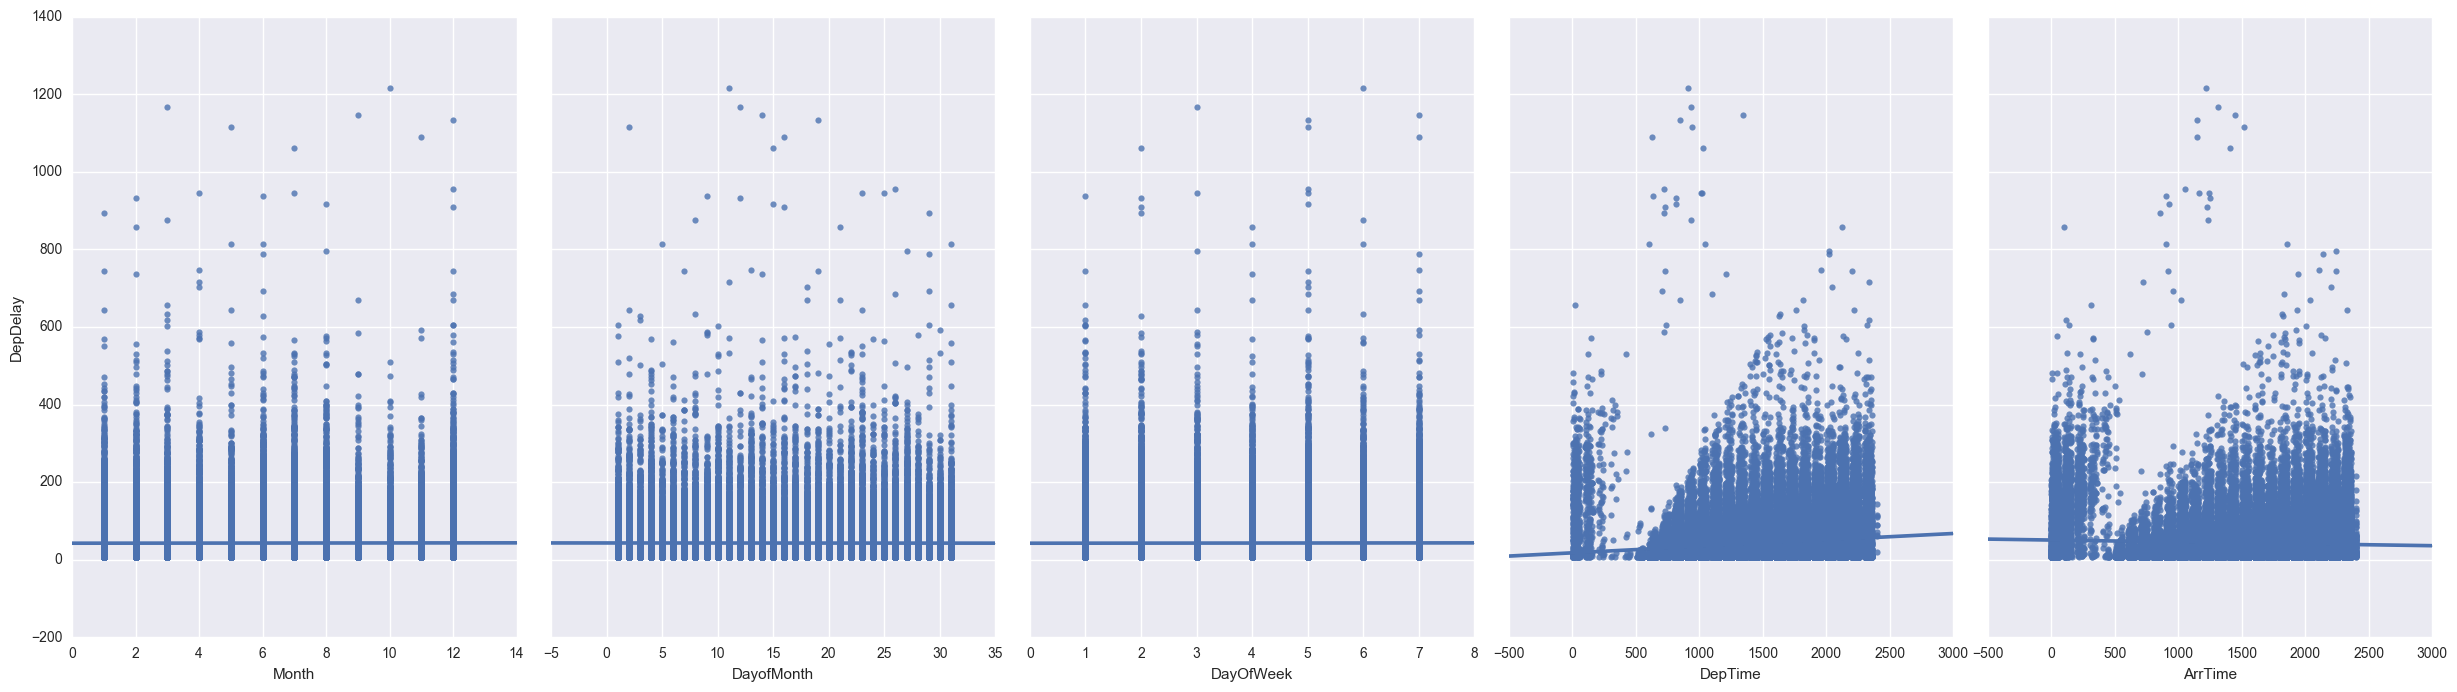

In [32]:
sns.pairplot(data,x_vars=['Month','DayofMonth','DayOfWeek','DepTime','ArrTime'],y_vars='DepDelay',size=7,aspect=0.7,kind='reg')

In [33]:
fltdata.shape

(1936758, 30)

In [34]:
#Data Cleaning (Use inplace = True to permanently drop the values)
#fltdata.dropna(how='any').shape
#fltdata.dropna(how='all').shape
fltdata.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [35]:
fltdata.notnull().sum()

Unnamed: 0           1936758
Year                 1936758
Month                1936758
DayofMonth           1936758
DayOfWeek            1936758
DepTime              1936758
CRSDepTime           1936758
ArrTime              1929648
CRSArrTime           1936758
UniqueCarrier        1936758
FlightNum            1936758
TailNum              1936753
ActualElapsedTime    1928371
CRSElapsedTime       1936560
AirTime              1928371
ArrDelay             1928371
DepDelay             1936758
Origin               1936758
Dest                 1936758
Distance             1936758
TaxiIn               1929648
TaxiOut              1936303
Cancelled            1936758
CancellationCode     1936758
Diverted             1936758
CarrierDelay         1247488
WeatherDelay         1247488
NASDelay             1247488
SecurityDelay        1247488
LateAircraftDelay    1247488
dtype: int64

In [36]:
fltdata.dropna(how='any',inplace='True')

In [37]:
fltdata.shape

(1247486, 30)

In [38]:
fltdata.

SyntaxError: invalid syntax (<ipython-input-38-5f52f97561a5>, line 1)